# Atividade 5 EQ024: Tecnologias de Fluidização
 - Determinar as velocidades de mínima fluidização de mistura e a velocidade completa de fluidização para partículas heterogêneas considerando seu processo composto de partículas binárias (agrupar as partículas em dois tamanhos) e polidispersas.
 - Determinar as velocidades de mínima fluidização e terminal para cada tamanho de partícula.
 - Comparar com os resultados obtidos na atividade 03, para partículas homogêneas.

[Resultados](#Resultados) Resultados

## Aluno: João Eduardo Levandoski

In [94]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import math
import pandas as pd

# Curva
### Gerador de distribuição aleatória, baseada na curva normal

In [95]:
numero_peneiras = 7 #Escolhendo o número de peneiras a ser utilizadas
razao = (2)**(1/2) #Escolhendo a razão entre os diâmetros das peneiras Raiz quadrada
abertura_1_penei = 6000 #Abertura da primeira peneira em microns 
media_dia = 4000 #Usando a media da distribuição normal,
                 #baseada no dado fornecido pela literatura
massa_total = 5680 #gramas 
var = 0.3 #Uma variação da curva normal para gerar os dados

In [96]:
random.seed(10)
dist_norm = []
for _ in range(int(massa_total)):
    dist_norm.append(random.normalvariate(media_dia,
                                          media_dia*var))

# Distribuição binária

In [97]:
numero_peneiras = 7 #Escolhendo o número de peneiras a ser utilizadas
razao = (2)**(1/2) #Escolhendo a razão entre os diâmetros das peneiras Raiz quadrada
abertura_1_penei = 6000 #Abertura da primeira peneira em microns 
media_dia1 = 5700 #Usando a media da distribuição normal,
                 #baseada no dado fornecido pela literatura
var1 = 0.05 #Uma variação da curva normal para gerar os dados
media_dia2 = 2700
massa_total = 5680 #gramas 
var2 = 0.2 #Uma variação da curva normal para gerar os dados

In [98]:
random.seed(10)
dist_norm = []
for _ in range(int(massa_total/2)):
    dist_norm.append(random.normalvariate(media_dia1,
                                          media_dia1*var1))
    dist_norm.append(random.normalvariate(media_dia2,
                                          media_dia2*var2))

# Tamanho das peneiras escolhidas em Microns

In [99]:
peneiras_total = [
    6680, #Mesh 3
    4699, #Mesh 4
    3327, #Mesh 6
    2362, #Mesh 8
    1651, #Mesh 10
    1168, #Mesh 14
    833,  #Mesh 20
    589,  #Mesh 28
    0     #Fundo
]

In [100]:
peneiras_menor = [ #Usadas no diâmetro menor
    3327, #Mesh 6
    2362, #Mesh 8
    1651, #Mesh 10
    1168, #Mesh 14
    833,  #Mesh 20
    589,  #Mesh 28
    0     #Fundo
]

In [101]:
peneiras_maior = [
    6680, #Mesh 3
    4699, #Mesh 4
    3327,
    0     #Fundo
]

In [102]:
peneiras = peneiras_maior
# peneiras = peneiras_menor
# peneiras = peneiras_total

peneiras = np.asarray(peneiras, dtype='int')

In [103]:
for i in range(len(peneiras)-2):
    print(f'Razão entre a peneira {peneiras[i]:5} e a\
    peneira {peneiras[i+1]:5}: {peneiras[i]/peneiras[i+1]:.4}')

Razão entre a peneira  6680 e a    peneira  4699: 1.422
Razão entre a peneira  4699 e a    peneira  3327: 1.412


Usando a distribuição gerada acima e as peneiras selecionadas       
fazemos a classificação das partículas   
A célula abaixo salva em um dicionário a classificação,    
e calcula o diâmetro médio de cada peneira $\frac{Di_{sup}}{Di_{inf}}$

In [104]:
penei = {} #Criando um dicionário com os dados 
bins = [] #Será usado como base para distribuição do histograma
d_i = [None, ]
lista =[]
itens = 0

penei.update({str(peneiras[0]): []})
            
for j in range(len(peneiras)-1):
    lista =[]
    for i in dist_norm:
        if peneiras[j] > i >=peneiras[j+1]:
            lista.append(i)
            itens += 1
    bins.append(peneiras[j+1])
    d_i += [(peneiras[j] + peneiras[j+1])/2]        
    penei.update({str(peneiras[j+1]): lista})
    
penei[str(peneiras[-1])] = []

A variável `diametro_inferior` contém o diâmetro                            
da peneira onde a massa de partículas fica retida.                       
A variável `massa_retida` contém a massa retida em cada uma das peneiras.    

`x_i`: Fração mássica por peneira.   
`X_i`: Fração mássica acumuladada por peneira.


In [105]:
diametro_inferior = []
massa_retida = []
for nome in penei:
    diametro_inferior.append(int(nome))
    massa_retida.append(len(penei[nome]))

itens = max(np.cumsum(massa_retida))

In [106]:
# massa_retida = [0, 1457, 2556, 1090, 359, 101, 23, 10, 0]

In [107]:
diametro_inferior = np.asarray(diametro_inferior[::]) 
                        #Isso é um array com o diâmetro da peneira inferior
                        #presente em cada uma das peneiras
massa_retida = np.asarray(massa_retida[::]) #Massa de material presente em cada peneira
x_i = massa_retida/(itens-1)
X_i = np.cumsum(massa_retida[::-1])/itens#Calculando a fração acumulada
X_i = X_i[::-1]
bins = np.asarray(bins[::-1])
d_i = np.asarray(d_i)

In [108]:
df = pd.DataFrame((diametro_inferior[::], massa_retida[::], x_i*100, X_i*100, d_i))
# df.rename(columns={0:'+3', 1:'-3\t+4',
#                    2:'-4\t+6', 3:'-6\t+8',
#                    4:'-8\t+10', 5:'-10\t+14',
#                    6:'-14\t+20', 7:'-20\t+28',
#                    8:'Fundo\t'}, inplace=True)
df.rename(index={0:'Diâmetro peneira ($\mu$m)', 1:'Massa Retida (g)',
                 2:'Frequência Ponderal', 3:'Fração Acumulada',
                 4:'Diâmetro médio ($\mu$m)'}, inplace=True)

# Frequencia

In [109]:
df

,0,1,2,3
Diâmetro peneira ($\mu$m),6680.0,4699.000000,3327.000000,0.0
Massa Retida (g),0.0,2839.000000,330.000000,0.0
Frequência Ponderal,0.0,89.614899,10.416667,0.0
Fração Acumulada,100.0,100.000000,10.413380,0.0
Diâmetro médio ($\mu$m),NaN,5689.500000,4013.000000,1663.5


# Plot da distribuição

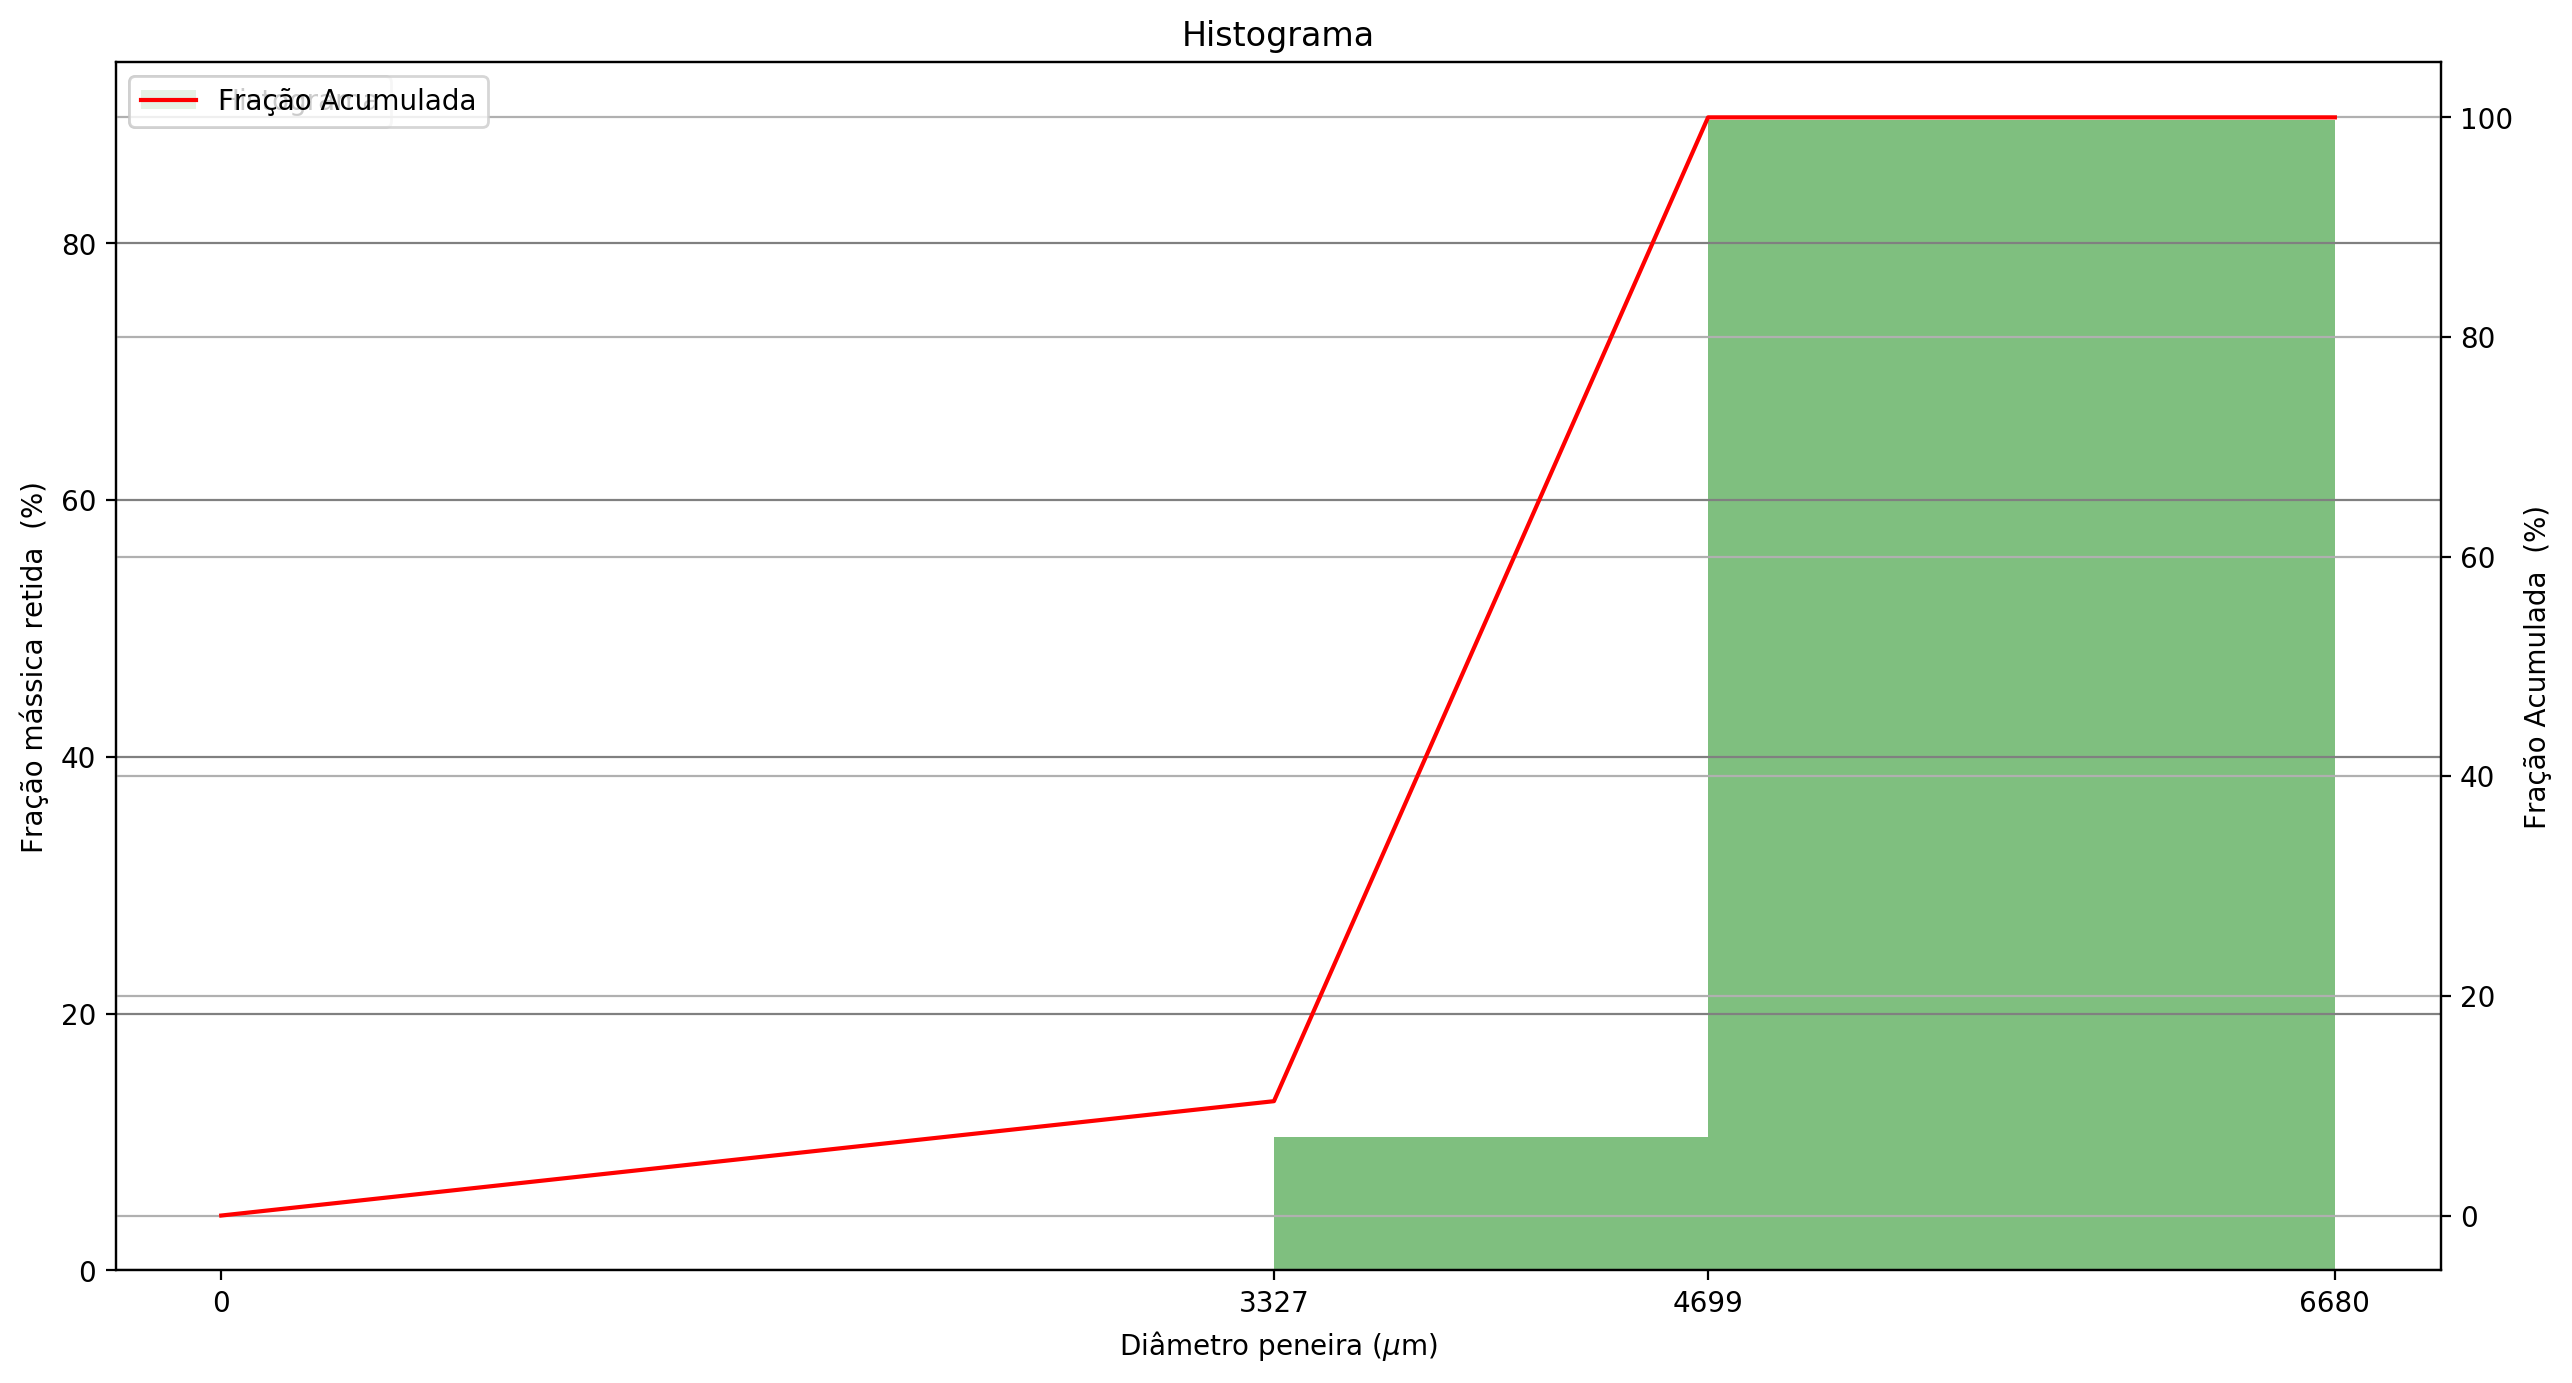

In [110]:
fig = plt.figure(figsize=(15,8), dpi=200)
ax = plt.axes()

# plt.xlim((math.ceil(0), math.floor(max(diametro_inferior))))
plt.xticks(diametro_inferior)
plt.hist(diametro_inferior, weights=x_i*100, bins=diametro_inferior[::-1],
         density=False, alpha = 0.5, color='green', label='Histograma')
plt.title('Histograma')
plt.xlabel('Diâmetro peneira ($\mu$m)')
plt.ylabel('Fração mássica retida  (%)')

ax_bis = ax.twinx()
ax_bis.plot(diametro_inferior, X_i*100, color='red', label='Fração Acumulada')
plt.xticks(diametro_inferior)
plt.xlabel('Diâmetro peneira ($\mu$m)')
plt.ylabel('Fração Acumulada  (%)')
ax_bis.grid(True)
ax.grid(True, axis='y', color='gray')
ax_bis.legend()
ax.legend()
plt.show()

# Modelos

In [111]:
%matplotlib inline

In [112]:
# %matplotlib qt

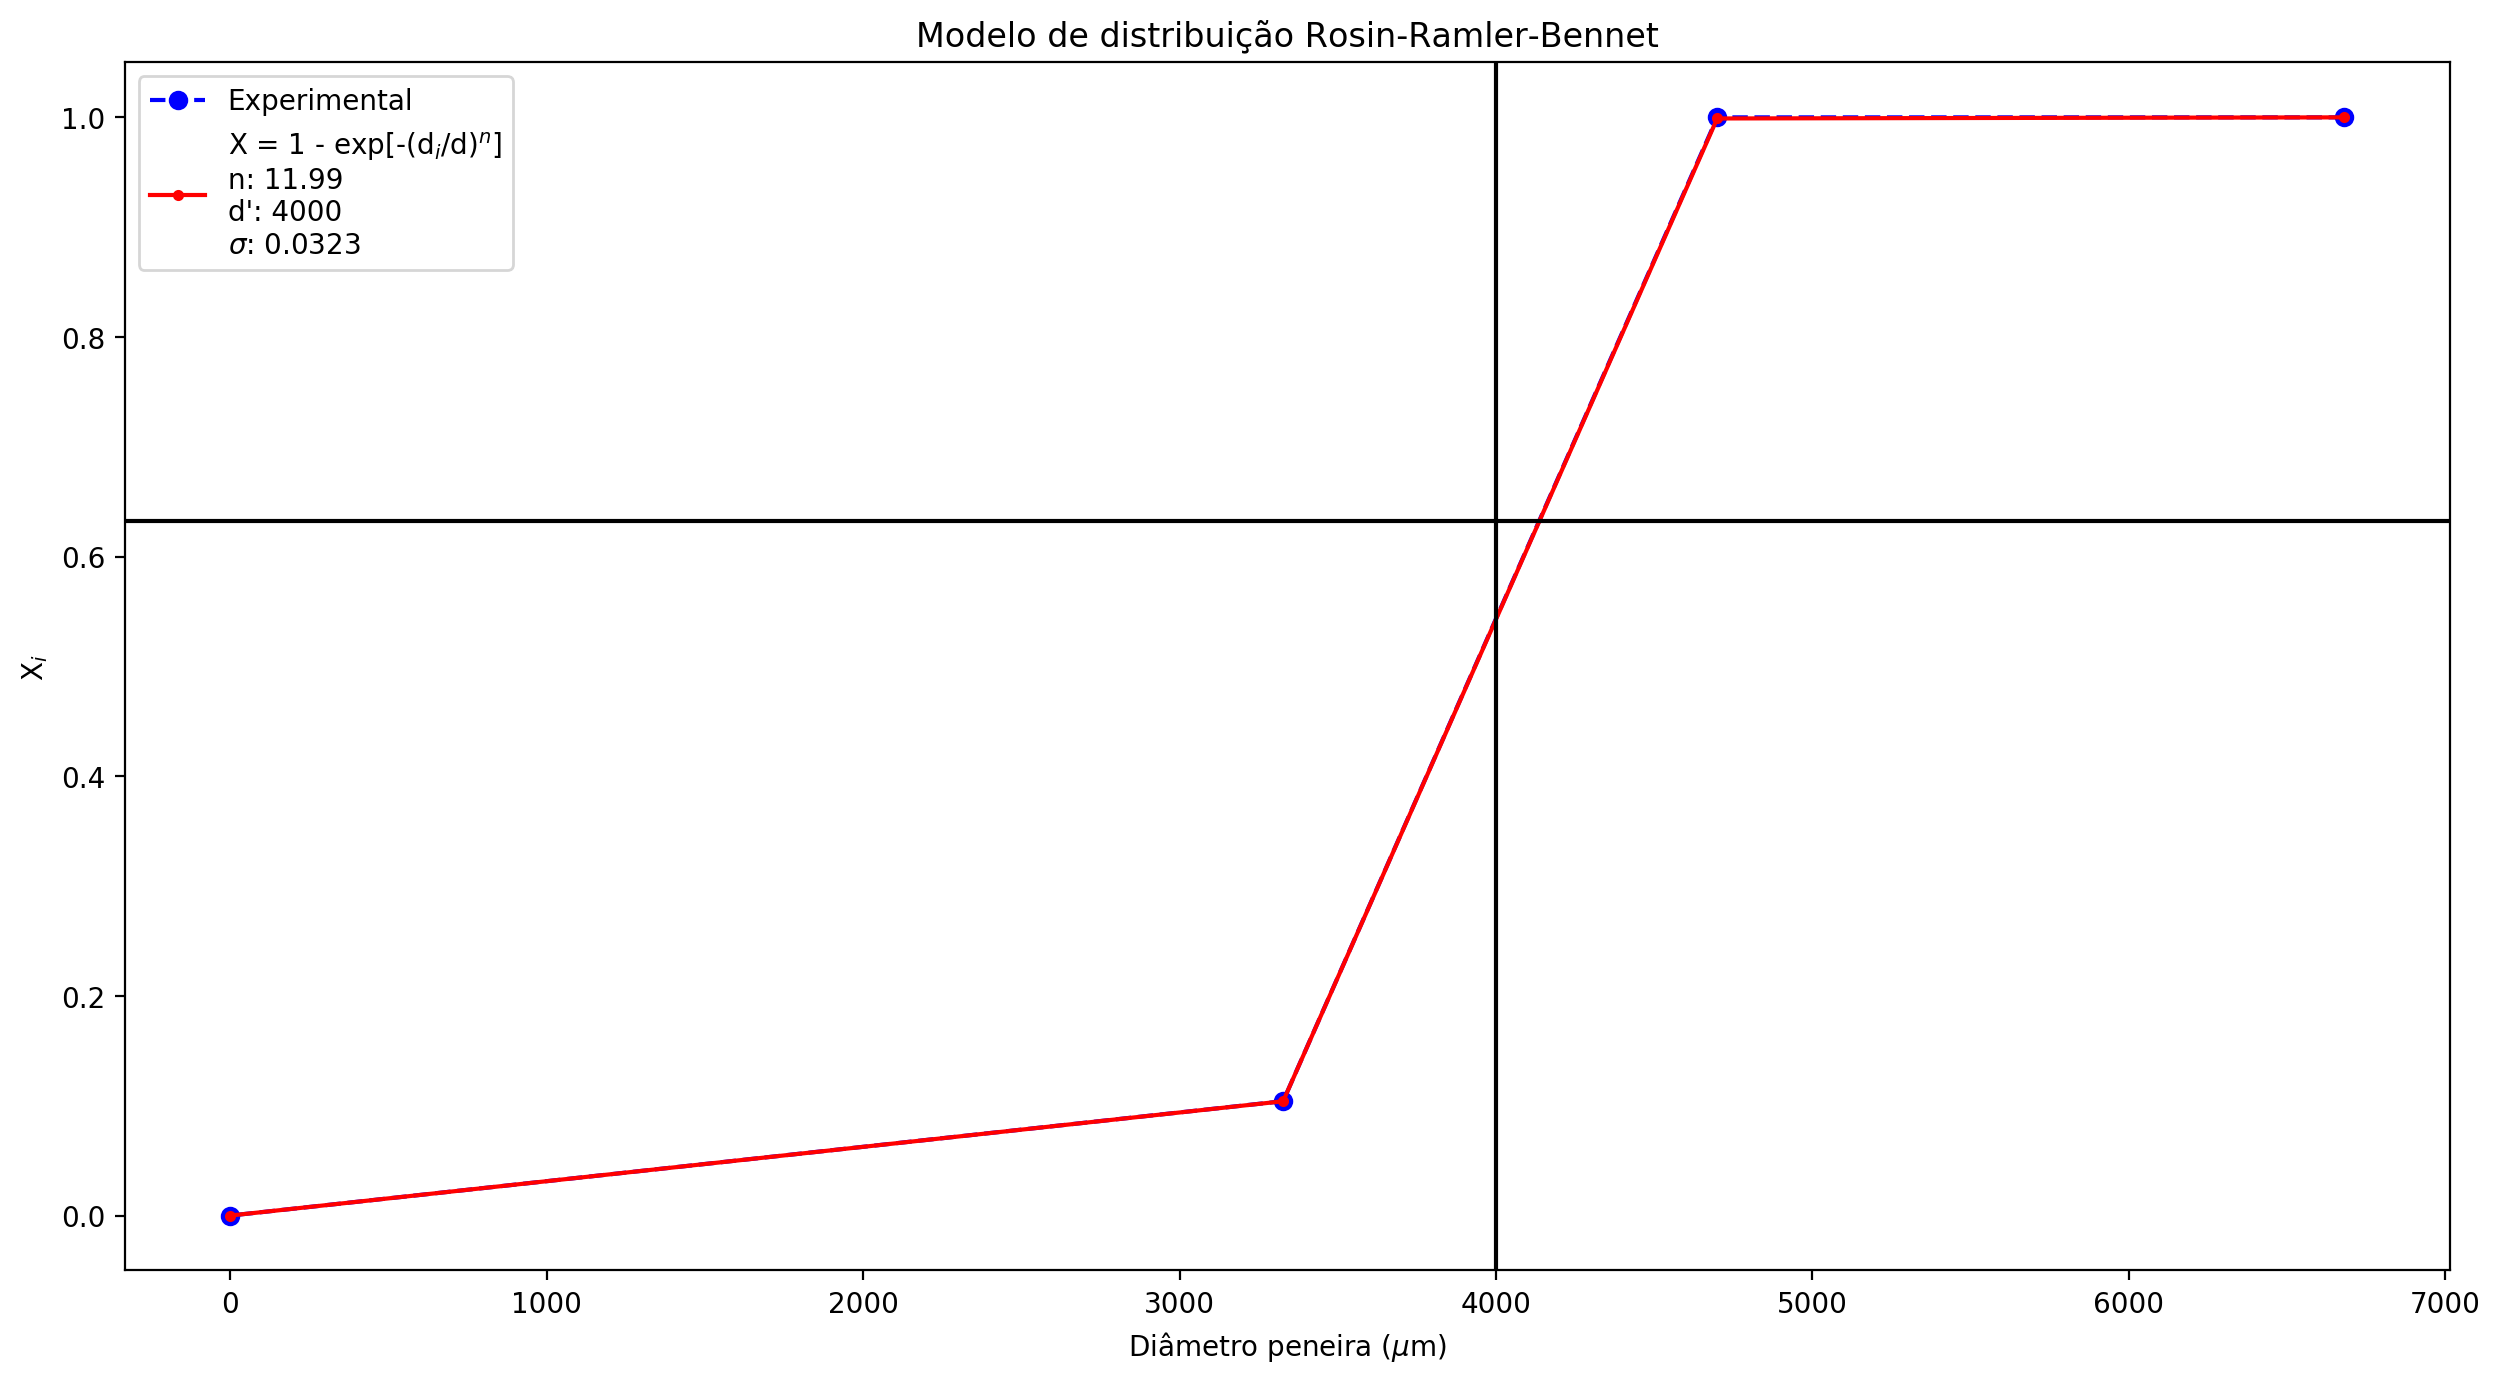

In [113]:
# d_linha = 1980
# d_linha = 4000
# d_linha = 3700

global d_linha
# d_linha = 1980
d_linha = 4000
# d_linha = 3700
# d_linha = 3099.5

def func(x, b):
    return 1 - np.exp(-(x/d_linha)**b)

xdata = diametro_inferior
ydata = X_i

fig = plt.figure(figsize=(15,8), dpi=200)

plt.plot(xdata, ydata, '--', label='Experimental', color='blue', marker='o')
popt, pcov = curve_fit(func, xdata, ydata)
n = popt[0]

# axis = np.linspace(min(xdata), max(xdata), 100)
axis = xdata

ax = plt.plot(axis, func(axis, *popt), 'r-',
    label=f"X = 1 - exp[-(d$_i$/d)$^n$]\nn: {popt[0]:5.4}\nd': {d_linha}\n$\sigma$: {np.sqrt(np.diag(pcov))[0]:5.4}",
    color='red', marker='.')

plt.title('Modelo de distribuição Rosin-Ramler-Bennet')
plt.xlabel('Diâmetro peneira ($\mu$m)')
plt.axhline(0.632, color='black')
plt.axvline(d_linha,color='black')
plt.ylabel('X$_i$')
plt.legend()
plt.show()

In [114]:
soma1 = 0
soma3 = 0
for i in range(1,len(d_i)):
    soma1+= (x_i[i]/d_i[i])
    soma3+= (x_i[i]/d_i[i]**3)

In [115]:
d_sauter = 1/soma1
d_2 = soma1/soma3
d_3 = 1/soma3

# Propriedades do Fluido

In [116]:
# d_sauter = 3586.68*10**-6
d_sauter = d_sauter*10**-6
densi_gas = 1.116
temp = 43
# densi_part = 557.10
densi_part = 1217 #Aparente
g = 9.81
visc = 18*10**-6
esf = 0.35
# esf = 1
d_sauter*10**6

5450.584115284178

# Diâmetro de Sauter

In [117]:
print(f'Diâmetro de Sauter: {d_sauter*10**6:8.6} microns')

Diâmetro de Sauter:  5450.58 microns


# Características do Equipamento/leito

In [118]:
D_c = 0.25

In [119]:
Ar = (d_sauter**3) * densi_gas * (densi_part - densi_gas) * g/(visc**2)
print(f'Arquimedes: {Ar:.9}')

Arquimedes: 6652876.69


# Velocidade terminal

In [120]:
def find_u_t(u_mf, d_p, densi_gas, visc, esf, g=9.81, err=0.0001):
    from math import exp
    i = 0
    u_old = 10*u_mf
    
    while i < 100:
        i += 1
        Re_p = ((d_p*u_old*densi_gas)/(visc))
        A = (1 + (8.1716*(exp(-4.0655*esf)))*Re_p**(0.0964+0.5565*esf)) 
        B = ((73.69*exp(-5.0748*esf)*Re_p)/(Re_p + 5.378*exp(6.2122*esf)))
        Cd= ((24/Re_p)*A + B)
        u_new = ((4*d_p*(densi_part-densi_gas)*g)/(3*densi_gas*Cd))**(1/2)
        
        dif = abs((u_new-u_old)/u_new)
        
        if dif < err:
#             print(Re_p)
            break
        u_old = u_new
    return u_new, Cd

In [121]:
Ks = {
    'Wen': (33.7, 0.0408),
    'Richardson': (25.7, 0.0365),
    'Saxena': (25.3, 0.0571),
    'Babu': (25.3, 0.0651),
    'Grace': (27.2, 0.0408),
    'Chitester': (28.7, 0.0494),
    'Tannous': (25.83, 0.043)
}

In [122]:
print(f'Número de Arquimedes: {Ar:10.8}')
print(f'Diâmetro utilizado: {d_sauter*10**6:8.6}')
print('Autor\t\tK1\tK2\t\tRe\t\tUₘ (m/s)\tUt (m/s)\tCd')
for autor in Ks:
    K1 = Ks[autor][0]
    K2 = Ks[autor][1]
    Re_pmf = ((K1)**2 + K2*Ar)**(1/2) - K1
    u_mf = ((Re_pmf * visc)/(d_sauter*densi_gas))
    u_t, cd = find_u_t(u_mf, d_sauter, densi_gas, visc, esf, g=9.81)
    if autor == 'Tannous':
        Umf = u_mf
    print(f'{autor:8}\t{K1}\t{K2}\t\t{Re_pmf:8.6}\t{u_mf:8.6}\t{u_t:8.6}\t{cd:.6}')

print(f'Velocidade mínima de fluidização (Tannous): {Umf:.6}')

Número de Arquimedes:  6652876.7
Diâmetro utilizado:  5450.58
Autor		K1	K2		Re		Uₘ (m/s)	Ut (m/s)	Cd
Wen     	33.7	0.0408		 488.385	  1.4452	 2.51892	12.2419
Richardson	25.7	0.0365		 467.748	 1.38413	 2.51892	12.2419
Saxena  	25.3	0.0571		 591.563	 1.75052	 2.51892	12.2419
Babu    	25.3	0.0651		 633.291	   1.874	 2.51892	12.2419
Grace   	27.2	0.0408		 494.506	 1.46331	 2.51892	12.2419
Chitester	28.7	0.0494		   545.3	 1.61362	 2.51892	12.2419
Tannous 	25.83	0.043		 509.652	 1.50813	 2.51892	12.2419
Velocidade mínima de fluidização (Tannous): 1.50813


In [123]:
Ufi = Umf*(1 - 0.49*np.exp(-0.22*n))
Ufc = Umf*(1 + 1.05*np.exp(-0.43*n))
Us = Umf*(1 + 0.56*np.exp(-1.09*n))
print(f'Ufi: {Ufi:5.4}\tUs:{Us:5.4}\tUfc:{Ufc:5.4}')

Ufi: 1.455	Us:1.508	Ufc:1.517


# Velocidade para cada diâmetro considerando polidispersa

In [124]:
Ufc_poli = 0 
print('Diâmetro\tFração\t\tRe\t\tUₘ (m/s)\tUt (m/s)')
for i in range(len(peneiras)-1):
    sup = peneiras[i]
#     print(sup)
    inf = peneiras[i+1]
    d_p = ((sup+inf)/2)*10**-6
    Ar_temp = (d_p**3) * densi_gas * (densi_part - densi_gas) * g/(visc**2)
    Re_pmf = ((25.83)**2 + 0.043*Ar_temp)**(1/2) - 25.83
    u_mf = ((Re_pmf * visc)/(d_p*densi_gas))
    u_t, cd = find_u_t(u_mf, d_p, densi_gas, visc, esf, g=9.81)
    Ufc_poli += x_i[i]*u_mf
    
    print(f'{d_p*10**6:8.6}\t{x_i[i]*100:8.5} %\t{Re_pmf:8.6}\t{u_mf:8.6}\t{u_t:8.6}')

Diâmetro	Fração		Re		Uₘ (m/s)	Ut (m/s)
  5689.5	     0.0 %	 545.162	 1.54547	 2.57151
  4013.0	  89.615 %	 313.048	  1.2582	 2.17738
  1663.5	  10.417 %	  67.976	0.659084	 1.46739


In [125]:
print(f'Ufc_poli: {Ufc_poli:5.4}')

Ufc_poli: 1.196


# Resultados

In [126]:
Ufc_poli = 0 
print('Diâmetro\tFração\t\tCumulativo\tRe\t\tUₘ (m/s)\tUt (m/s)')
for i in range(len(peneiras)-1):
    sup = peneiras[i]
#     print(sup)
    inf = peneiras[i+1]
    d_p = ((sup+inf)/2)*10**-6
    Ar_temp = (d_p**3) * densi_gas * (densi_part - densi_gas) * g/(visc**2)
    Re_pmf = ((25.83)**2 + 0.043*Ar_temp)**(1/2) - 25.83
    u_mf = ((Re_pmf * visc)/(d_p*densi_gas))
    u_t, cd = find_u_t(u_mf, d_p, densi_gas, visc, esf, g=9.81)
    Ufc_poli += x_i[i]*u_mf
    
    print(f'{d_p*10**6:8.6}\t{x_i[i+1]*100:8.5} %\t{X_i[i+1]*100:8.5} %\t{Re_pmf:8.6}\t{u_mf:8.6}\t{u_t:8.6}')

print('\n\n\n\n\n\n')

print(f'Número de Arquimedes: {Ar:10.8}')
print(f'Diâmetro utilizado: {d_sauter*10**6:8.6}')
print('Autor\t\tK1\tK2\t\tRe\t\tUₘ (m/s)\tUt (m/s)\tCd')
for autor in Ks:
    K1 = Ks[autor][0]
    K2 = Ks[autor][1]
    Re_pmf = ((K1)**2 + K2*Ar)**(1/2) - K1
    u_mf = ((Re_pmf * visc)/(d_sauter*densi_gas))
    u_t, cd = find_u_t(u_mf, d_sauter, densi_gas, visc, esf, g=9.81)
    if autor == 'Tannous':
        Umf = u_mf
    print(f'{autor:8}\t{K1}\t{K2}\t\t{Re_pmf:8.6}\t{u_mf:8.6}\t{u_t:8.6}\t{cd:.6}')

print(f'Velocidade mínima de fluidização (Tannous): {Umf:.6}')



print('\n\n\n\n\n\n')
Ufi = Umf*(1 - 0.49*np.exp(-0.22*n))
Ufc = Umf*(1 + 1.05*np.exp(-0.43*n))
Us = Umf*(1 + 0.56*np.exp(-1.09*n))
print(f'Ufi: {Ufi:5.4}\tUs:{Us:5.4}\tUfc:{Ufc:5.4}')
print('\n\n\n\n\n\n')

print(f'Ufc_poli: {Ufc_poli:5.4}')

Diâmetro	Fração		Cumulativo	Re		Uₘ (m/s)	Ut (m/s)
  5689.5	  89.615 %	   100.0 %	 545.162	 1.54547	 2.57151
  4013.0	  10.417 %	  10.413 %	 313.048	  1.2582	 2.17738
  1663.5	     0.0 %	     0.0 %	  67.976	0.659084	 1.46739







Número de Arquimedes:  6652876.7
Diâmetro utilizado:  5450.58
Autor		K1	K2		Re		Uₘ (m/s)	Ut (m/s)	Cd
Wen     	33.7	0.0408		 488.385	  1.4452	 2.51892	12.2419
Richardson	25.7	0.0365		 467.748	 1.38413	 2.51892	12.2419
Saxena  	25.3	0.0571		 591.563	 1.75052	 2.51892	12.2419
Babu    	25.3	0.0651		 633.291	   1.874	 2.51892	12.2419
Grace   	27.2	0.0408		 494.506	 1.46331	 2.51892	12.2419
Chitester	28.7	0.0494		   545.3	 1.61362	 2.51892	12.2419
Tannous 	25.83	0.043		 509.652	 1.50813	 2.51892	12.2419
Velocidade mínima de fluidização (Tannous): 1.50813







Ufi: 1.455	Us:1.508	Ufc:1.517







Ufc_poli: 1.196


# Todas as peneiras

# Peneiras Maiores

# Peneiras Menores

In [127]:
df

,0,1,2,3
Diâmetro peneira ($\mu$m),6680.0,4699.000000,3327.000000,0.0
Massa Retida (g),0.0,2839.000000,330.000000,0.0
Frequência Ponderal,0.0,89.614899,10.416667,0.0
Fração Acumulada,100.0,100.000000,10.413380,0.0
Diâmetro médio ($\mu$m),NaN,5689.500000,4013.000000,1663.5


In [128]:
# Imergíveis
# Emergíveis

di =(6680+4699)/2

xi = .59
de = (3327+2362)/2

xe = .41

In [129]:
# Imergíveis
# Emergíveis

di = 5451.03 #por sauter
# di = di*10**-6

xi = 0.55811906


de = 2479.71
# de = de*10**-6

xe = 0.44188094  #por sauter

In [130]:
R0 = xi*densi_part + xe*densi_part
R1 = xi*densi_part*di + xe*densi_part*de

densi_med = densi_part

dm = di*de*(R0/R1)

Ar = (dm**3) * densi_gas * (densi_med - densi_gas) * g/(visc**2)

T_Uma = (visc/(dm*densi_med))*((19.2**2 + 0.032*Ar)**0.5 -19.9)
T_Uma
# dm

0.9692557981549274

In [131]:
# Mais pessado é o I


M0 = xi*densi_part + xe*densi_part
M1 =  xe*densi_part*di + xi*densi_part*de

densi_med = densi_part

dm = di*de*(M0/M1)*10**-5.16

Ar = (dm**3) * densi_gas * (densi_med - densi_gas) * g/(visc**2)

M_Uma = (visc/(dm*densi_med))*((5.5210**-4 )* (Ar**1.044))
M_Uma
# Ar
# M0
# M1
# dm*10**3

0.9687127300554066